# Problem 1

Using the graph presented in `Figure 1` as input, and assuming that the goal state is `11`, list the order in which the nodes will be visited (i.e., expanded) if they are generated in `ascending order`:

1. When using breadth-first search.
2. When using depth-first search.
3. When using iterative deepening depth-first search.

<p align="center">
  <img align="center" width="400" alt="figure1" src="./images/figure1.png"/>
</p>

As we can see is obvious that a solution exists, and the graph is a tree, so we can use the search algorithms to find the solution and the order in which the nodes will be visited.


# Main Objectives

The main objective of this problem is to understand the differences between the three search algorithms presented in the question. In particular, the goal is to understand how the order in which the nodes are generated can affect the performance of the search algorithms.

# Secondary Objectives

The secondary objectives are to compare the performance of the three search algorithms in terms of time taken.


# Methodology

For this purpose, the following libraries will be necessary:

-   **Networkx**: For efficient handling of graphs and/or trees
-   **Matplotlib**: To display both the problem and the results of the analysis
-   **Deque**: For efficient handling of queues (Optional)
-   **NumPy**: For handling numerical data (Optional - Plot the results)

What we will do is to create a graph in a simple representation using dictionaries, then we will implement the three search algorithms and we will analyze the results interms of time taken and number of nodes.

Finally we will plot the results to see the differences between the three search algorithms.


# Implementation

The graph implementation will be a dictionary-based representation. In this one, the graph will be represented as a dictionary where the keys are the nodes and the values are the neighbors of the nodes. The following cell will present the implementation of the graph.


In [400]:
from collections import deque
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import networkx as nx
import time
import numpy as np

For the implementation of the graph as a dictionary a function called `create_graph` will be created. This function will return a dictionary where the keys are the nodes and the values are the neighbors of the nodes. The following cell will present the implementation of the graph.


In [401]:
def create_graph() -> Dict[int, List[int]]:
    """
    Creates a graph representing a tree structure.

    Returns:
        graph (Dict[int, List[int]]):
            A dictionary representing the graph,
            where each key is a node and the corresponding value is a list of its child nodes.
    """
    graph: Dict[int, List[int]] = {
        1: [2, 3],
        2: [4, 5],
        3: [6, 7],
        4: [8, 9],
        5: [10, 11],  # Goal
        6: [12, 13],
        7: [14, 15],

        # leaf nodes
        8: [],
        9: [],
        10: [],
        11: [],  # Goal
        12: [],
        13: [],
        14: [],
        15: []
    }
    return graph

Then it will be necessary to implement the three search algorithms. The first algorithm to be implemented is the breadth-first search. The following cell will present the implementation of the breadth-first search algorithm. The function `bfs` will receive the graph, the start node, and the goal node as input and will return the order in which the nodes were visited until the goal node was found.


In [402]:
def bfs(graph: Dict[int, List[int]], start: int, goal: int) -> List[int]:
    visited: List[int] = [] # Reached Nodes
    queue: deque = deque([start]) # Frontier

    while queue:
        node: int = queue.popleft()
        if node == goal:
            visited.append(node)
            return visited
        if node not in visited:
            visited.append(node)
            queue.extend([n for n in graph[node] if n not in visited])

    return visited

The second algorithm to be implemented is the depth-first search. The following cell will present the implementation
of the depth-first search algorithm. The function `dfs` will receive the graph, the start node, and the goal
node as input and will return the order in which the nodes were visited until the goal node was found.


In [403]:
def dfs(graph: Dict[int, List[int]], start: int, goal: int) -> List[int]:
    visited: List[int] = [] # Reached Nodes
    stack: List[int] = [start] # Frontier

    while stack:
        node: int = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            stack.extend(reversed(graph[node]))

    return visited

The third algorithm to be implemented is the iterative deepening depth-first search. The following cell will
present the implementation of the iterative deepening depth-first search algorithm. The function `iddfs`
will receive the graph, the start node, the goal and it will return the order in which the nodes were visited until the goal node was found and the path to the goal node.


In [404]:
def iddfs(
        graph: Dict[int, List[int]],
        start: int,
        goal: int
        ) -> Tuple[List[int], List[int]]:
    visited_order: List[int] = []
    path_to_goal: List[int] = []

    def dls(node: int, depth: int, path: List[int]) -> bool:
        if node not in path:
            visited_order.append(node)

        if node == goal:
            path_to_goal.extend(path + [node])
            return True
        
        if depth == 0:
            return False
        
        for neighbour in graph[node]:
            if dls(neighbour, depth - 1, path + [node]):
                return True
            
        return False

    depth = 0
    while not dls(start, depth, []):
        depth += 1
        if depth > len(graph):
            break

    return visited_order, path_to_goal

# Results

We now need to test if the algorithms are working correctly. So we will run the three algorithms with the
graph presented in `Figure 1` and the goal state is `11`.


In [405]:
graph: Dict[int, List[int]] = create_graph()
start_node: int = 1
goal_node: int = 11

bfs_visited: List[int] = bfs(graph, start_node, goal_node)
dfs_visited: List[int] = dfs(graph, start_node, goal_node)
iddfs_visited: List[int] = iddfs(graph, start_node, goal_node)

print(f"BFS: {bfs_visited} -- ", f"Number of nodes visited: {len(bfs_visited)}")
print(f"DFS: {dfs_visited} -- ", f"Number of nodes visited: {len(dfs_visited)}")
print(f"IDS: {iddfs_visited} -- ", f"Number of nodes visited: {len(iddfs_visited[0])}")

BFS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] --  Number of nodes visited: 11
DFS: [1, 2, 4, 8, 9, 5, 10, 11] --  Number of nodes visited: 8
IDS: ([1, 1, 2, 3, 1, 2, 4, 5, 3, 6, 7, 1, 2, 4, 8, 9, 5, 10, 11], [1, 2, 5, 11]) --  Number of nodes visited: 19


The output follows the expected behavior and order.

The behavior of the three search algorithms is as follows:

1. Breadth-first search: The nodes are visited in the order `1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11`.
2. Depth-first search: The nodes are visited in the order `1, 2, 4, 8, 9, 5, 10, 11`.
3. Iterative deepening depth-first search: The nodes are visited in the order `1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11`. without revisiting the nodes.
4. Iterative deepening depth-first search: The path to the goal node is `1, 1, 2, 3, 1, 2, 4, 5, 3, 6, 7, 1, 2, 4, 8, 9, 5, 10, 11`. revisiting the nodes.


To see the the visited nodes in the three search algorithms we will use the `networkx` library to plot the graph and the visited nodes.
So we will create a function called `plot_search_algorithms` that will receive the graph and the visited nodes as input and will plot the graph and the visited nodes.


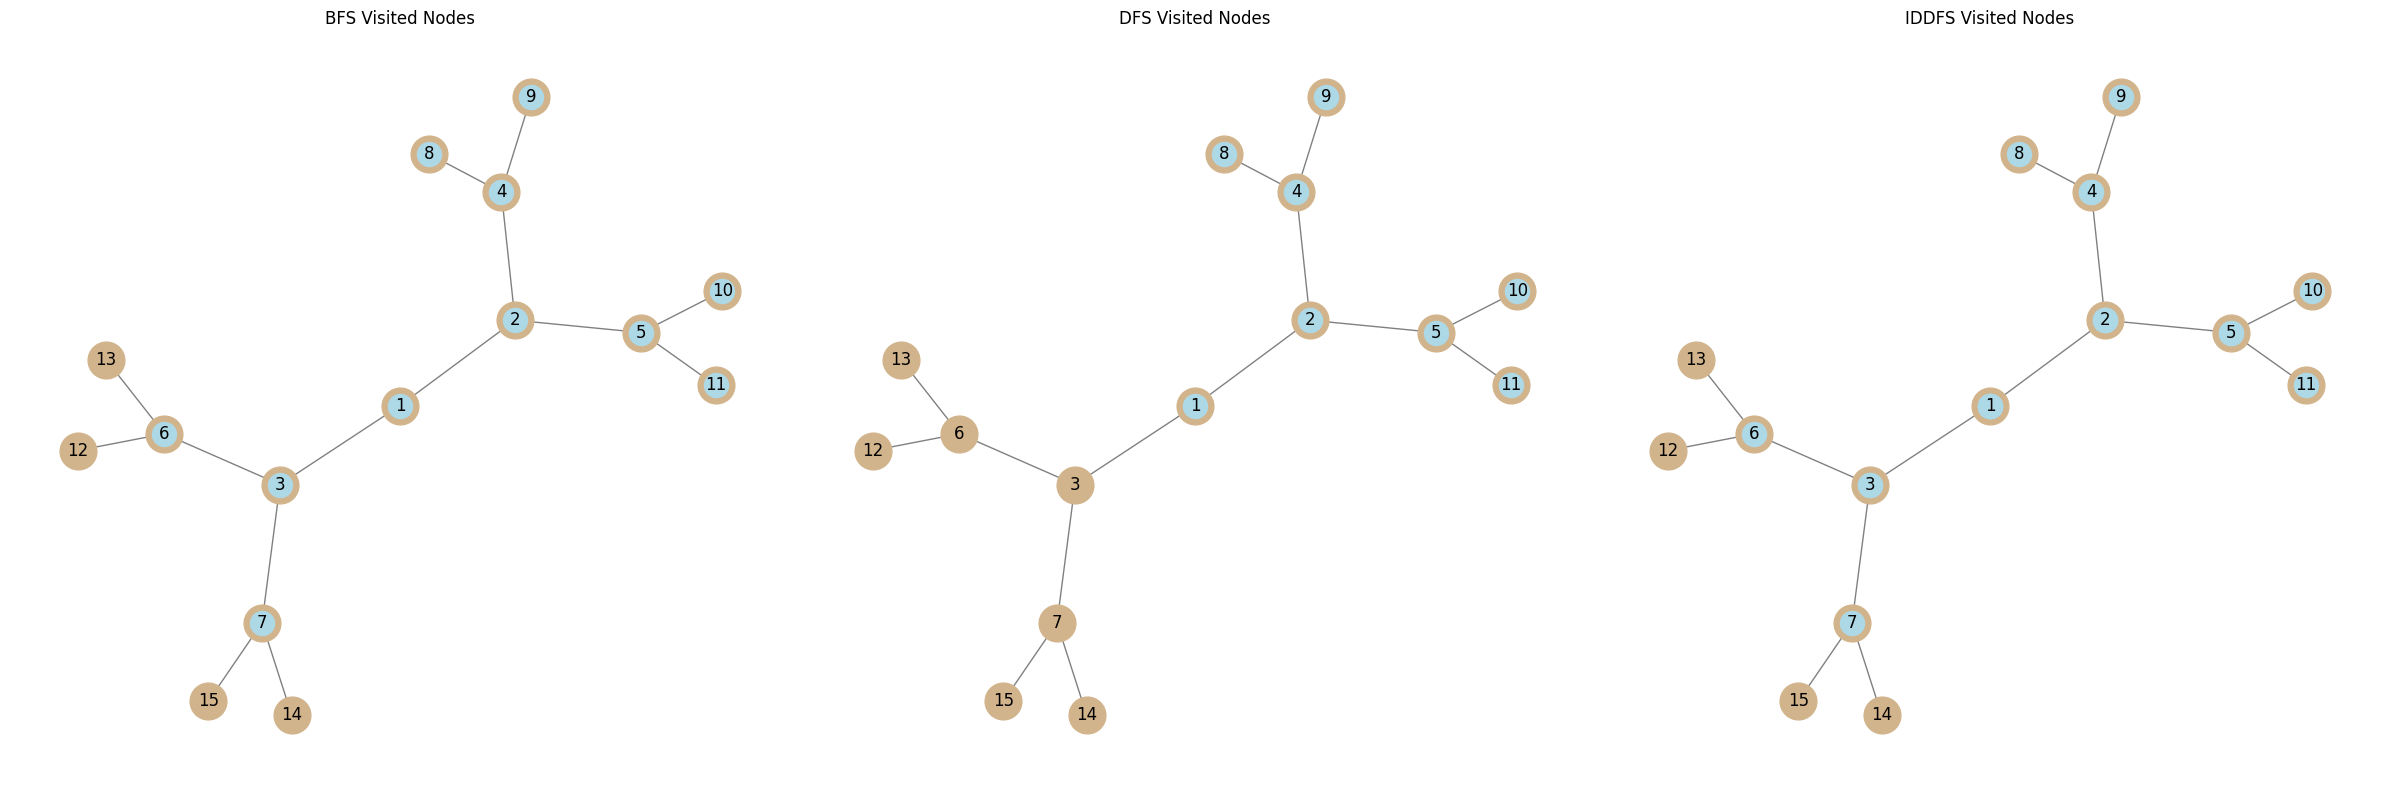

In [406]:
def plot_search_algorithms(graph: Dict[int, List[int]], bfs_order: List[int], dfs_order: List[int], iddfs_order: List[int]):
    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)

    # Define positions for all nodes
    pos = nx.spring_layout(G, seed=42)

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

    # Plot BFS
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_size=700, node_color='tan', edge_color='grey')
    nx.draw_networkx_nodes(G, pos, nodelist=bfs_order, node_color='lightblue', ax=axes[0])
    axes[0].set_title('BFS Visited Nodes')

    # Plot DFS
    nx.draw(G, pos, ax=axes[1], with_labels=True, node_size=700, node_color='tan', edge_color='grey')
    nx.draw_networkx_nodes(G, pos, nodelist=dfs_order, node_color='lightblue', ax=axes[1])
    axes[1].set_title('DFS Visited Nodes')

    # Plot IDDFS
    nx.draw(G, pos, ax=axes[2], with_labels=True, node_size=700, node_color='tan', edge_color='grey')
    nx.draw_networkx_nodes(G, pos, nodelist=iddfs_order[0], node_color='lightblue', ax=axes[2])
    axes[2].set_title('IDDFS Visited Nodes')

    plt.tight_layout()
    plt.show()

plot_search_algorithms(graph, bfs_visited, dfs_visited, iddfs_visited)

In order to compare the performance of the search algorithms, we can measure the time taken to find the goal node. We can use the time module to measure the time taken by each algorithm to find the goal node. For that we will create a function called `measure_average_execution_time` that will receive the graph, and the number of iterations to measure the average execution time of the three search algorithms. The function will return the average execution time of the three search algorithms. The start node and the goal node will be the same as the original problem. Also a function called `plot_average_execution_time` will be created to plot the average execution time of the three search algorithms.


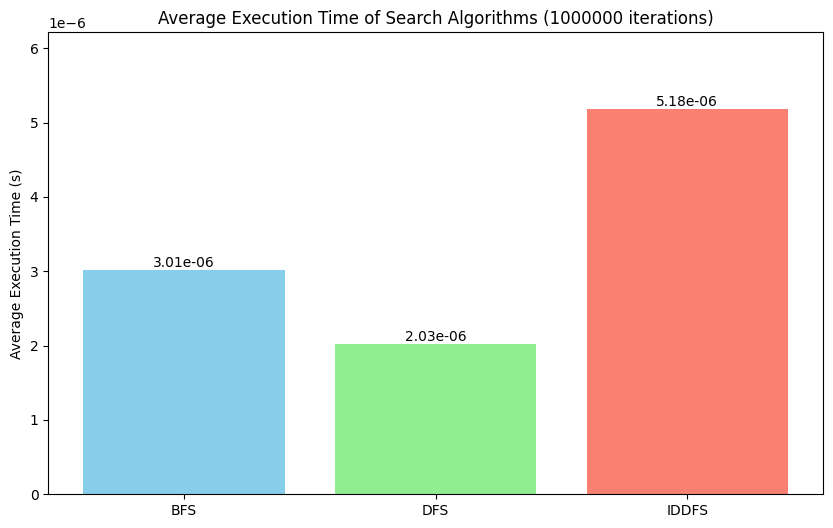

In [407]:
# define a seed for reproducibility
np.random.seed(100)

def measure_average_execution_time(graph: Dict[int, List[int]], iterations: int = 100):
    # Initialize lists to store execution times
    bfs_times, dfs_times, iddfs_times = [], [], []

    # Randomly select start and goal nodes for each iteration
    nodes = list(graph.keys())
    for _ in range(iterations):
        start, goal = [1, 11]

        # Measure BFS time
        start_time = time.time()
        bfs(graph, start, goal)
        bfs_times.append(time.time() - start_time)

        # Measure DFS time
        start_time = time.time()
        dfs(graph, start, goal)
        dfs_times.append(time.time() - start_time)

        # Measure IDDFS time
        start_time = time.time()
        iddfs(graph, start, goal)
        iddfs_times.append(time.time() - start_time)

    # Calculate average times
    avg_bfs_time = np.mean(bfs_times)
    avg_dfs_time = np.mean(dfs_times)
    avg_iddfs_time = np.mean(iddfs_times)

    return avg_bfs_time, avg_dfs_time, avg_iddfs_time

def plot_average_times(algorithms: list, avg_times: list, colors: list, title: str, ylabel: str):
    plt.figure(figsize=(10, 6))
    
    # Creating the bar plot with labels
    bars = plt.bar(algorithms, avg_times, color=colors)
    for bar, time in zip(bars, avg_times):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{time:.2e}', ha='center', va='bottom')
    
    # Setting titles and labels
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(0, max(avg_times) * 1.2)  # Add some space above the highest bar
    
    plt.show()

# Measure and plot the average execution times
iterations = 1000000
avg_bfs_time, avg_dfs_time, avg_iddfs_time = measure_average_execution_time(graph, iterations)

plot_average_times(
    algorithms = ['BFS', 'DFS', 'IDDFS'],
    avg_times = [avg_bfs_time, avg_dfs_time, avg_iddfs_time],
    colors = ['skyblue', 'lightgreen', 'salmon'],
    title = f'Average Execution Time of Search Algorithms ({iterations} iterations)',
    ylabel = 'Average Execution Time (s)'
)

To summarize the results, we will show all in the following table where we will show the algorithm, the path to the goal node, the total number of nodes visited, and the average execution time of the three search algorithms.

<table>
  <tr>
    <th>Algorithm</th>
    <th>Path</th>
    <th>Total</th>
    <th>Time</th>
  </tr>
  <tr>
    <td>BFS</td>
    <td>1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11</td>
    <td>11</td>
    <td>3 x 10^-6 seconds</td>
  </tr>
  <tr>
    <td>DFS</td>
    <td>1, 2, 4, 8, 9, 5, 10, 11</td>
    <td>8</td>
    <td>2 x 10^-6 seconds</td>
  </tr>
  <tr>
    <td>IDS</td>
    <td>1, 1, 2, 3, 1, 2, 4, 5, 3, 6, 7, 1, 2, 4, 8, 9, 5, 10, 11</td>
    <td>19</td>
    <td>5 x 10^-6 seconds</td>
  </tr>
</table>


# Conclusions

As established in the methodology, the three search algorithms were implemented and tested with the graph presented in `Figure 1` and the goal state is `11`.

Based on this experiment, here are some conclusions:

1. IDDFS has the highest average execution time: The bar for IDDFS is significantly taller than the others, indicating it has the longest execution time among the three algorithms.

2. DFS is the fastest on average: The red bar, representing DFS, is the shortest, which implies that, on average, DFS found the goal node faster than the other algorithms.

3. BFS has a moderate average execution time: The blue bar for BFS is higher than DFS but significantly lower than IDDFS, placing it in the middle of the three in terms of average execution time.

These results suggest that, on average, DFS is the fastest algorithm to find the goal node, while IDDFS is the slowest. However, it's important to note that these results are based on the specific graph and start/goal nodes chosen for this analysis. The performance of the algorithms may vary depending on the structure of the graph, the location of the goal node, and other factors. In general, BFS is known for finding the shortest path in unweighted graphs, while DFS is more memory-efficient and can be faster in certain scenarios. IDDFS is a combination of the two, providing a balance between completeness and efficiency.

These results suggest that for the specific graph and set of start and goal nodes chosen in these iterations, DFS was the most efficient algorithm in terms of time to find the goal. However, it's important to remember that these results might not generalize to all graphs or scenarios. Each algorithm has its own use case where it performs best, depending on the structure of the graph, the location of the goal node, and other factors. DFS might be the quickest in sparse or trees, BFS could be the best for unweighted graphs where the shortest path is needed, and IDDFS might be preferred where a complete search is required with limited space.
